In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

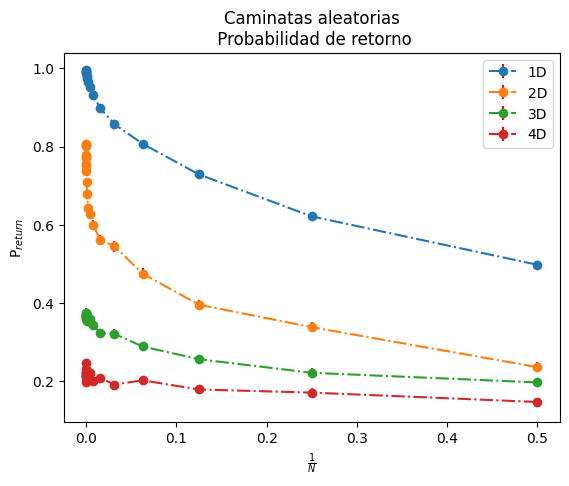

In [33]:
df1 = pd.read_csv("Datos/caminante_1d.csv")
df2 = pd.read_csv("Datos/caminante_2d.csv")
df3 = pd.read_csv("Datos/caminante_3d.csv")
df4 = pd.read_csv("Datos/caminante_4d.csv")

indfil=10 
plt.errorbar(1/df1['n_max'],df1['prob'],yerr=df1["error"],marker="o",ls="-.",ecolor="red",label="1D")
plt.errorbar(1/df2['n_max'],df2['prob'],yerr=df2["error"],marker="o",ls="-.",ecolor="red",label="2D")
plt.errorbar(1/df3['n_max'],df3['prob'],yerr=df3["error"],marker="o",ls="-.",ecolor="red",label="3D")
plt.errorbar(1/df4['n_max'],df4['prob'],yerr=df4["error"],marker="o",ls="-.",ecolor="red",label="4D")

plt.title("Caminatas aleatorias\n Probabilidad de retorno")
plt.xlabel('$\\frac{1}{N}$')
#plt.xscale("log")
plt.ylabel('P$_{return}$')
plt.legend()
plt.show()